# Appendix - Stochastic Gradient Descent

We've been using stochastic gradient descent for model training. In this section we'll discuss briefly how it works. For simplicity, we'll focus only on the features Sex and Fare.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from time import time

np.random.seed(1337)

df = pd.read_csv('data/titanic.csv')

In [2]:
df_train = df.iloc[:712, :]

scaler = StandardScaler()
features = ['Sex', 'Fare']

X_train = scaler.fit_transform(df_train[features].values)
y_train = df_train['Survived'].values
y_train_onehot = pd.get_dummies(df_train['Survived']).values

In [3]:
df_test = df.iloc[712:, :]

X_test = scaler.transform(df_test[features].values)
y_test = df_test['Survived'].values

In [4]:
def softmax(x):
    return np.exp(x) / np.exp(x).sum()

Instead of using the random matrix we started with, we make slight adjustments to the weights at every step. We track the values for the weights and biases at the start and end, and evaluate model accuracy at these points.

In [5]:
min_loss = 1000
best_weights = ()

W = np.random.rand(2, 2) * 0.01
b = np.random.rand(2,) * 0.01

scores = []
loss = 0

W_start = W
b_start = b
metrics = []

learning_rate = 0.001

for j in range(X_train.shape[0]):
    result = np.dot(W, X_train[j]) + b        
    W = W - learning_rate * np.dot((result - y_train_onehot[j]).reshape(2,1), X_train[j].reshape(1,2))
        
    result = softmax(result)
    scores.append(list(result))
        
    label_index = np.argmax(y_train_onehot[j])
    loss += -np.log(result[label_index])
    
    metrics.append([W[1, 0], W[1, 1], loss/(j+1)])
    
W_end = W
b_end = b
metrics = np.array(metrics)

In [6]:
def accuracy(W, b):
    scores = []

    for j in range(X_test.shape[0]):
        result = np.dot(W, X_test[j]) + b
        result = softmax(result)
        scores.append(list(result))

    y_prediction = np.argmax(np.array(scores), axis=1)
    return np.sum(y_prediction == y_test) / float(len(y_test))

In [7]:
print("accuracy at start", accuracy(W_start, b_start))
print("accuracy at end", accuracy(W_end, b_end))

accuracy at start 0.3575418994413408
accuracy at end 0.8044692737430168


In [8]:
print("label-1 weights at start", W_start[1, :])
print("label-1 weights at end", W_end[1, :])

label-1 weights at start [0.00278127 0.00459317]
label-1 weights at end [-0.12697803  0.05778664]


We notice that accuracy has improved significantly by these adjustments. Note that the label-1 weight for Sex goes from a positive value at initialization to a negative value. The model has 'learned' that the higher the value of this feature, the less likely that passenger would survive. This is indeed consistent with the data.

We visualize how the label-1 weights change over time, changing from red to green with the number of steps.

(-0.004072479803945144, 0.06041082415889434)

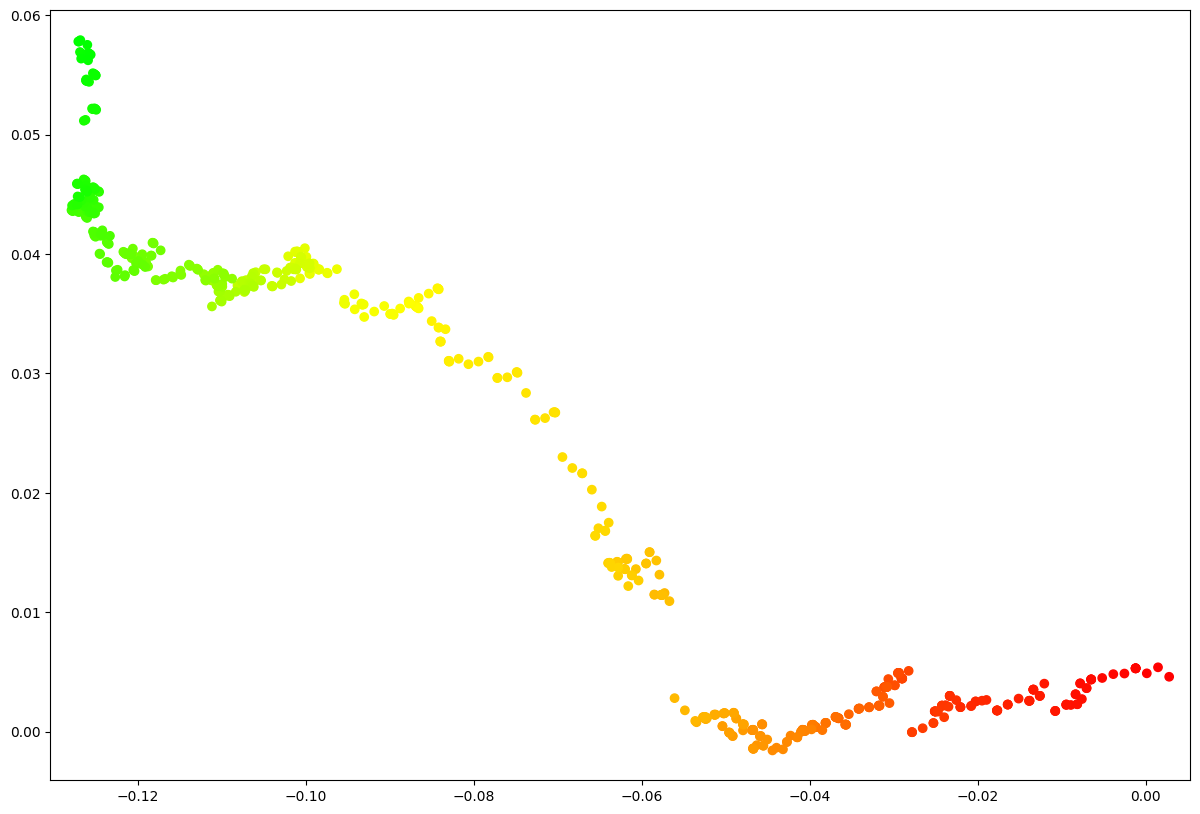

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

border = 0.0025

fig1 = plt.figure(figsize=(50,10))
ax1 = plt.subplot(131)

alphas = np.linspace(0, 1, 356)
ones = np.ones(356)
rgba_colors = np.zeros((712,4))
rgba_colors[:, 0] = np.concatenate([ones, ones-alphas])
rgba_colors[:, 1] = np.concatenate([alphas, ones])
rgba_colors[:, 3] = np.ones(712)

ax1.scatter(metrics[:, 0], metrics[:, 1], c=rgba_colors, edgecolor=rgba_colors)
ax1.set_xlim([metrics[:, 0].min()-border, metrics[:, 0].max()+border])
ax1.set_ylim([metrics[:, 1].min()-border, metrics[:, 1].max()+border])